The dataset can be found at https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks?select=tracks.csv
and the audio features are described here at https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features.

In [1]:
import pandas as pd
import numpy as np
from spotify.plots import SpotifyPlots
from spotify.data_transformations import DataTransformations

In [2]:
df = pd.read_csv(
    "/home/sabyasachi/git/spotify_tracks/dataset/tracks.csv"
)  # Read dataframe

In [3]:
print(f"The shape of the dataframe is {df.shape}.")

The shape of the dataframe is (586672, 20).


In [4]:
df.info() # check datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [5]:
df.describe()  # In particular, we note that max of popularity is 100.0, min is 0.0.

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


Based on the information about the audio features listed above, I transform the dataset.

In [6]:
DF = DataTransformations.preprocess(df)

In [7]:
DF.info() # check if the datatype transformation was successful

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106177 entries, 39511 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                106177 non-null  object        
 1   name              106177 non-null  object        
 2   popularity        106177 non-null  int64         
 3   duration_ms       106177 non-null  int64         
 4   explicit          106177 non-null  category      
 5   artists           106177 non-null  object        
 6   id_artists        106177 non-null  object        
 7   release_date      106177 non-null  datetime64[ns]
 8   danceability      106177 non-null  float64       
 9   energy            106177 non-null  float64       
 10  key               106177 non-null  category      
 11  loudness          106177 non-null  float64       
 12  mode              106177 non-null  category      
 13  speechiness       106177 non-null  float64       
 14  

In [8]:
"""Make these columns amenable to a histogram plot."""
DF_copy = DF.copy()
DF_copy["key"] = DF_copy["key"].astype("int8")
DF_copy["time_signature"] = DF_copy["time_signature"].astype("int8")
DF_copy["mode"] = DF_copy["mode"].astype("int8")
DF_copy["explicit"] = DF_copy["explicit"].astype("int8")

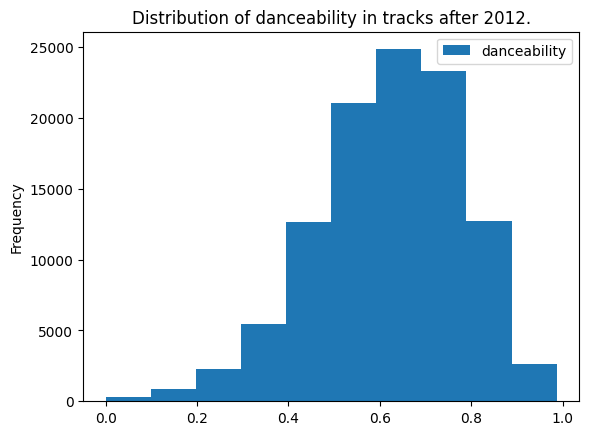

None


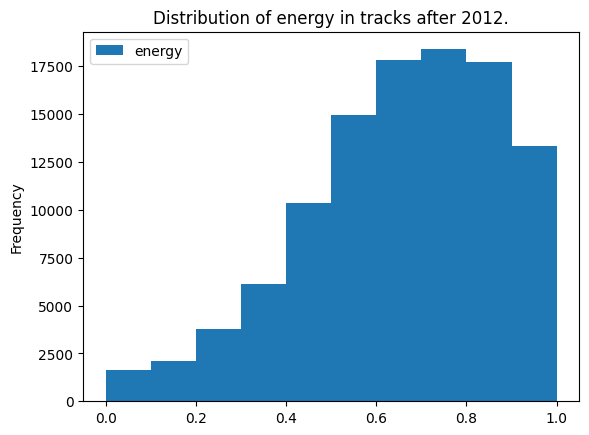

None


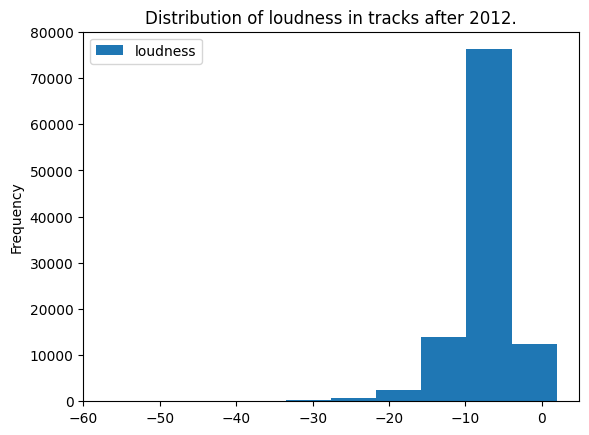

None


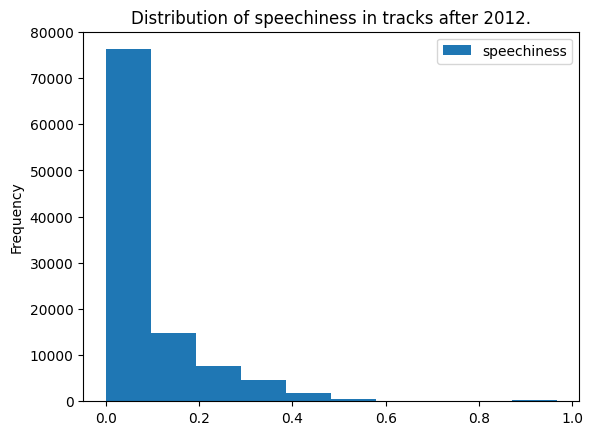

None


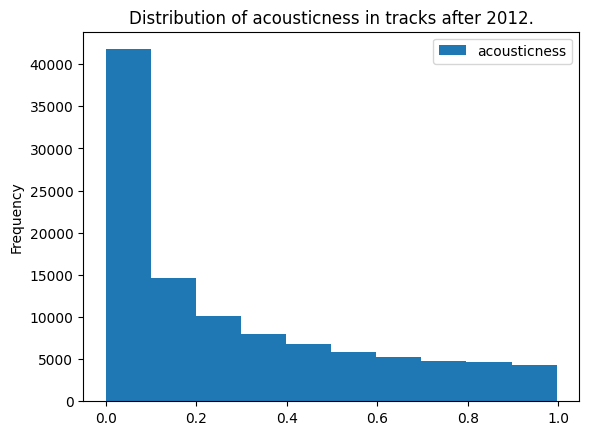

None


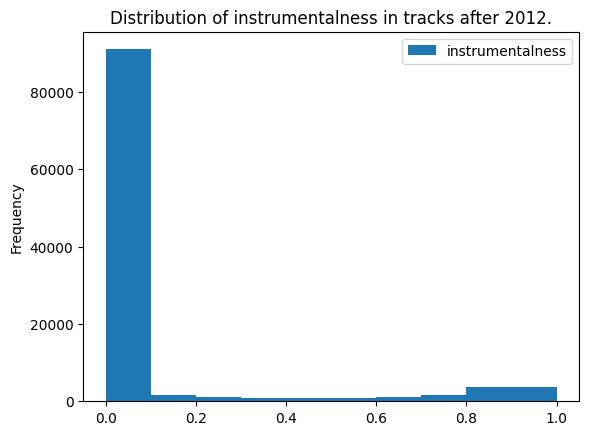

None


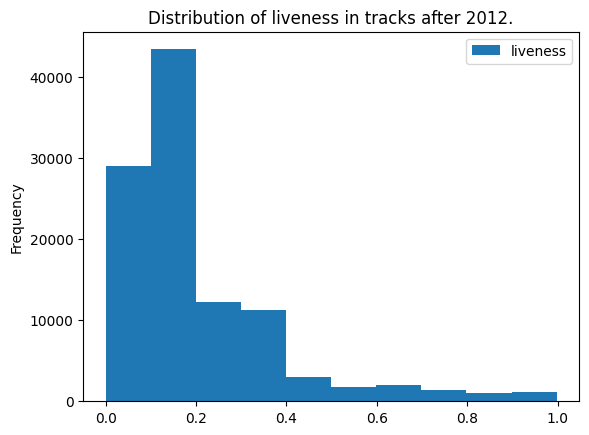

None


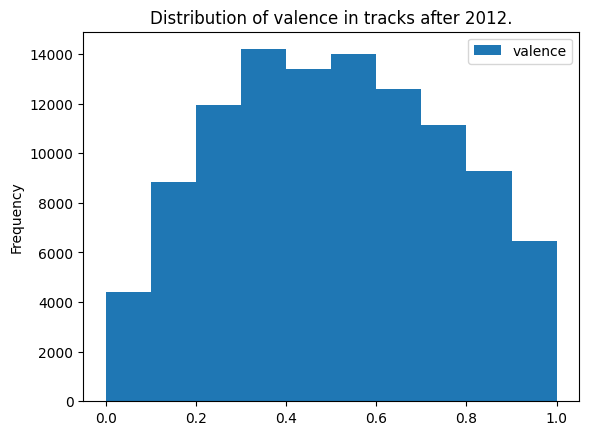

None


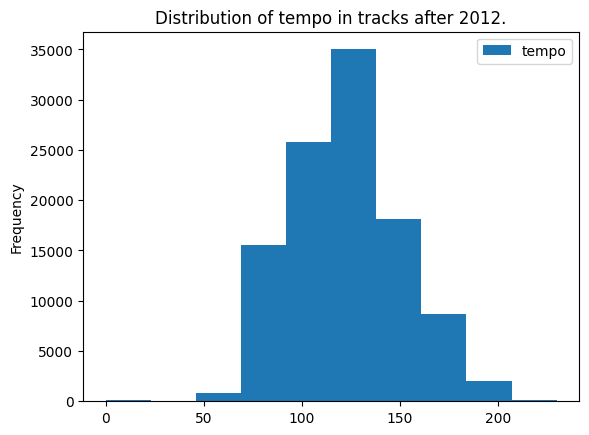

None


In [9]:
selected_columns = list(DF_copy.select_dtypes(include=['float64', 'category'])) # select columns that have dtype float64, category
#selected_columns = list(DF.select_dtypes(include=['float64']))
for column in selected_columns:
    print(SpotifyPlots.distribution_plot(DF_copy, column_name=column))


We now know the distribution of each of these attributes. We particularly note the heaveily skewed distribution of
`acousticness`, `instrumentalness`, and `speechiness`.